In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names in CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.3634 - loss: 1.7243 - val_accuracy: 0.5673 - val_loss: 1.2098
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5860 - loss: 1.1686 - val_accuracy: 0.6202 - val_loss: 1.0622
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6529 - loss: 0.9880 - val_accuracy: 0.6668 - val_loss: 0.9520
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6976 - loss: 0.8690 - val_accuracy: 0.6882 - val_loss: 0.8928
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7199 - loss: 0.7936 - val_accuracy: 0.6842 - val_loss: 0.9143
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7456 - loss: 0.7246 - val_accuracy: 0.6981 - val_loss: 0.8866
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7632 - loss: 0.6720 - val_accuracy: 0.6824 - val_loss: 0.9433
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7810 -

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 2s - 5ms/step - accuracy: 0.7189 - loss: 0.8583
Test accuracy: 0.7189000248908997


In [14]:
# Make predictions with the model
predictions = model.predict(test_images)

# Get the top prediction for the first test image
predicted_label = class_names[np.argmax(predictions[0])]
print(f"Predicted label for the first image: {predicted_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted label for the first image: cat


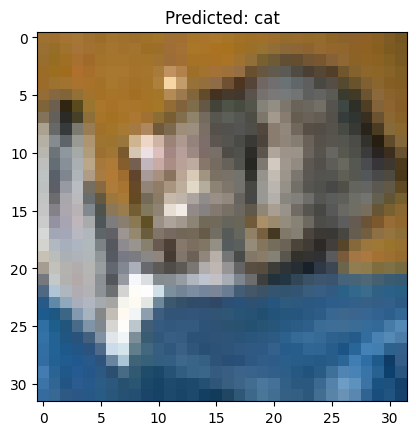

In [20]:
# Display the first test image and its predicted label
plt.imshow(test_images[0])
plt.title(f"Predicted: {predicted_label}")
plt.show()
